<a href="https://colab.research.google.com/github/budikukuh23/Machine-Learning/blob/Latihan/Klasifikasi_Gambar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Proyek Akhir : Klasifikasi Gambar**

---


Nama:
Muhhamad Kukuh Budi Martono

In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
!pip install split_folders

In [3]:
import zipfile,os
import splitfolders

In [4]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2021-05-06 07:04:54--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z  14%[=>                  ]  44.59M  5.10MB/s    in 9.7s    

2021-05-06 07:05:05 (4.59 MB/s) - Read error at byte 46759936/322873683 (Connection reset by peer). Retrying.

--2021-05-06 07:05:06--  (try: 2)  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M)

In [15]:
local_zip = 'rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('proyek_akhir')
zip_ref.close()

In [16]:
splitfolders.ratio('proyek_akhir/rockpaperscissors/rps-cv-images', 'proyek_akhir/rockpaperscissors/gambar', seed=1, ratio=(.60055, .39945))

Copying files: 2188 files [00:00, 3731.79 files/s]


In [17]:
base_dir = 'proyek_akhir/rockpaperscissors/gambar'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [18]:
os.listdir('proyek_akhir/rockpaperscissors/gambar/train')

['rock', 'paper', 'scissors']

In [19]:
  os.listdir('proyek_akhir/rockpaperscissors/gambar/val')

['rock', 'paper', 'scissors']

In [20]:
train_batu = os.path.join(train_dir, 'rock')
train_kertas = os.path.join(train_dir, 'paper')
train_gunting = os.path.join(train_dir, 'scissors')

val_batu = os.path.join(validation_dir, 'rock')
val_kertas = os.path.join(validation_dir, 'paper')
val_gunting = os.path.join(validation_dir, 'scissors')

In [21]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    horizontal_flip=True,
                    shear_range = 0.2)

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    horizontal_flip=True,
                    shear_range = 0.2)

In [22]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(256, 256),
        batch_size=32,
        class_mode='categorical',
        color_mode='rgb',
        shuffle=True,
        seed=42)

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(256, 256),
        batch_size=32,
        class_mode='categorical',
        color_mode='rgb',
        shuffle=True,
        seed=42)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [23]:
contoh_gambar_latih, _ = next(train_generator)
contoh_gambar_val, _ = next(validation_generator)

In [24]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

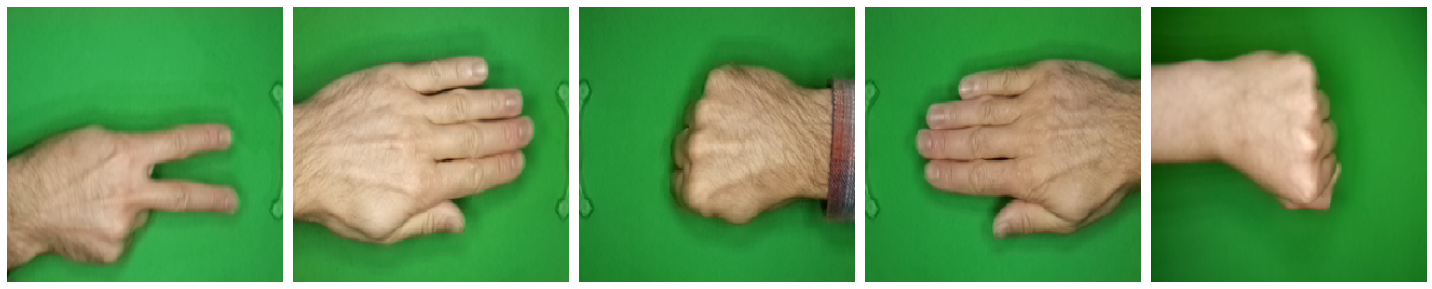

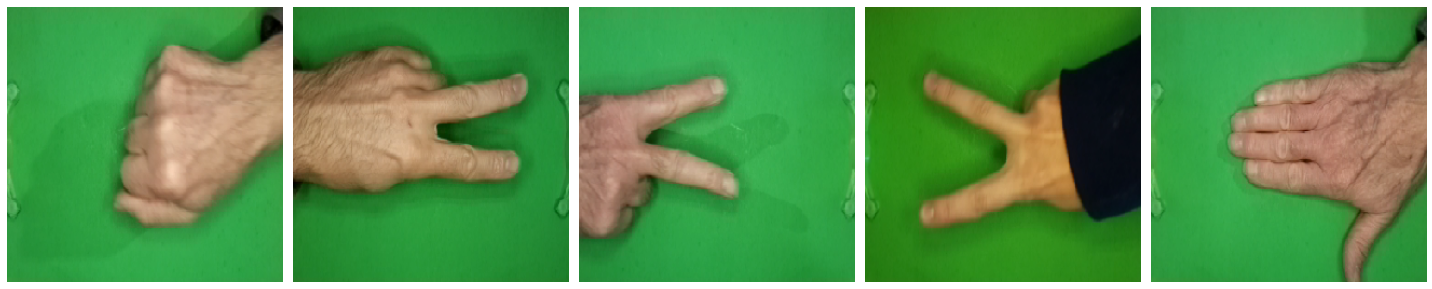

In [25]:
import matplotlib.pyplot as plt

plotImages(contoh_gambar_latih[:5])
plotImages(contoh_gambar_val[:5])

In [26]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [27]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [29]:
riwayat = model.fit(
      train_generator,
      steps_per_epoch=15,
      epochs=15,
      validation_data=validation_generator,
      validation_steps=5,
      verbose=1)

Epoch 1/20
20/20 [==============================] - 124s 6s/step - loss: 0.2548 - accuracy: 0.9219 - val_loss: 0.1797 - val_accuracy: 0.9438
Epoch 2/20
20/20 [==============================] - 128s 6s/step - loss: 0.1637 - accuracy: 0.9406 - val_loss: 0.3476 - val_accuracy: 0.8562
Epoch 3/20
20/20 [==============================] - 124s 6s/step - loss: 0.2018 - accuracy: 0.9234 - val_loss: 0.1888 - val_accuracy: 0.9500
Epoch 4/20
20/20 [==============================] - 123s 6s/step - loss: 0.1538 - accuracy: 0.9500 - val_loss: 0.1749 - val_accuracy: 0.9312
Epoch 5/20
20/20 [==============================] - 123s 6s/step - loss: 0.1386 - accuracy: 0.9453 - val_loss: 0.0749 - val_accuracy: 0.9750
Epoch 6/20
20/20 [==============================] - 123s 6s/step - loss: 0.1575 - accuracy: 0.9469 - val_loss: 0.2324 - val_accuracy: 0.9312
Epoch 7/20
20/20 [==============================] - 123s 6s/step - loss: 0.1040 - accuracy: 0.9688 - val_loss: 0.2020 - val_accuracy: 0.9375
Epoch 8/20
20

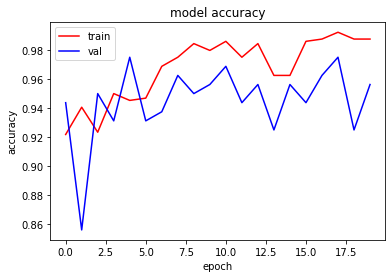

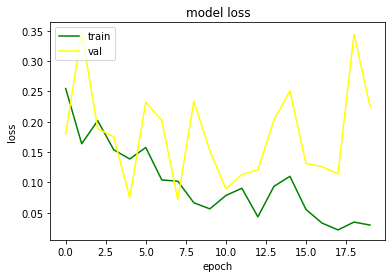

In [30]:
import matplotlib.pyplot as plt

akurasi = riwayat.history['accuracy']
val_akurasi = riwayat.history['val_accuracy']

loss = riwayat.history['loss']
val_loss = riwayat.history['val_loss']

plt.plot(akurasi, color='red')
plt.plot(val_akurasi, color='blue')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(loss, color='green')
plt.plot(val_loss, color='yellow')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Saving 0bioBZYFCXqJIulm.png to 0bioBZYFCXqJIulm.png
0bioBZYFCXqJIulm.png
This is Rock


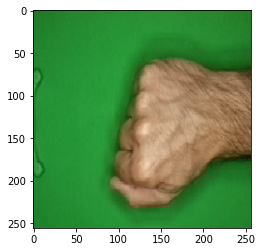

In [32]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  path = fn
  img = image.load_img(path, target_size=(256,256))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=32)
  
  print(fn)
  if classes[0,0]!=0:
    print('This is Paper')
  elif classes[0,1]!=0:
    print('This is Rock')
  else:
    print('This is Scissors')